In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('/content/insurance.csv')
display(df.head())

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [114]:
df.shape

(1340, 10)

In [115]:
pd.set_option("display.float_format","{:.2f}".format)

In [116]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.isna().sum()

,0
Id,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3
claim,0


In [119]:
df.dropna(inplace = True)

In [120]:
df.shape

(1332, 10)

In [121]:
df.isna().sum().sum()

np.int64(0)

In [122]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


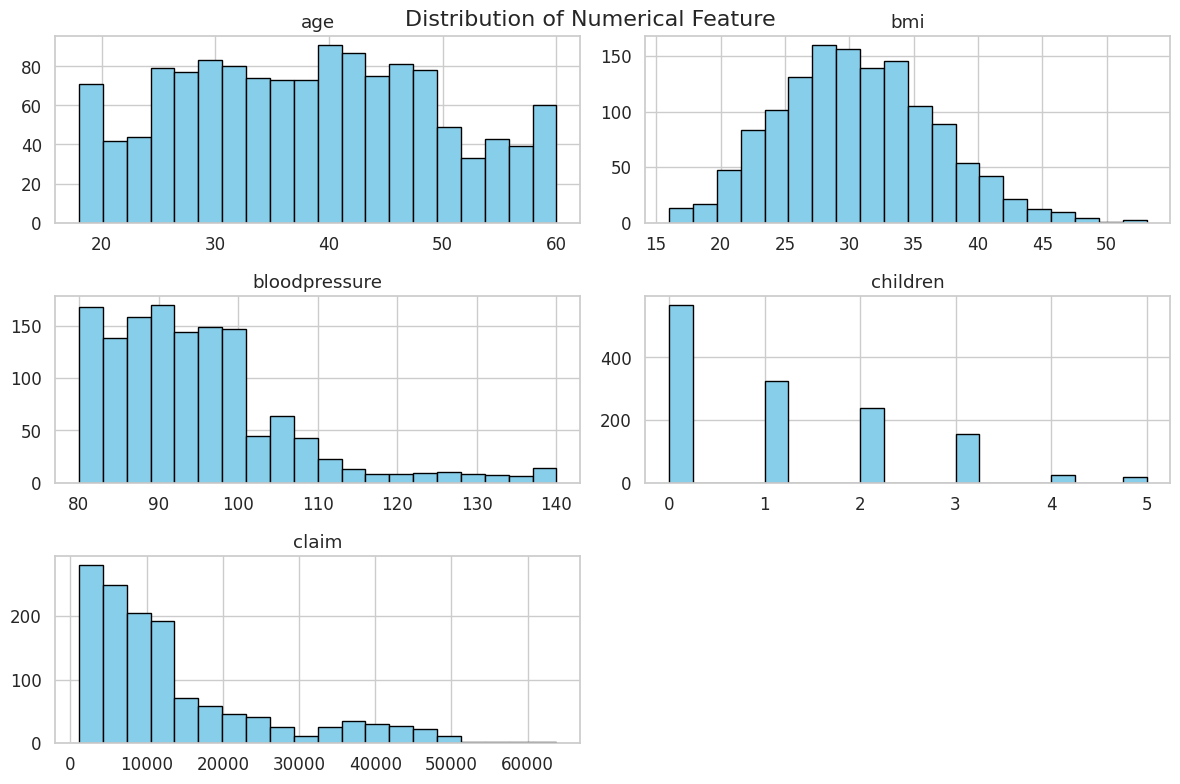

In [123]:
numeric_cols = ["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8),color = "skyblue",edgecolor = "black")
plt.tight_layout()
plt.suptitle("Distribution of Numerical Feature",fontsize=16)
plt.show()

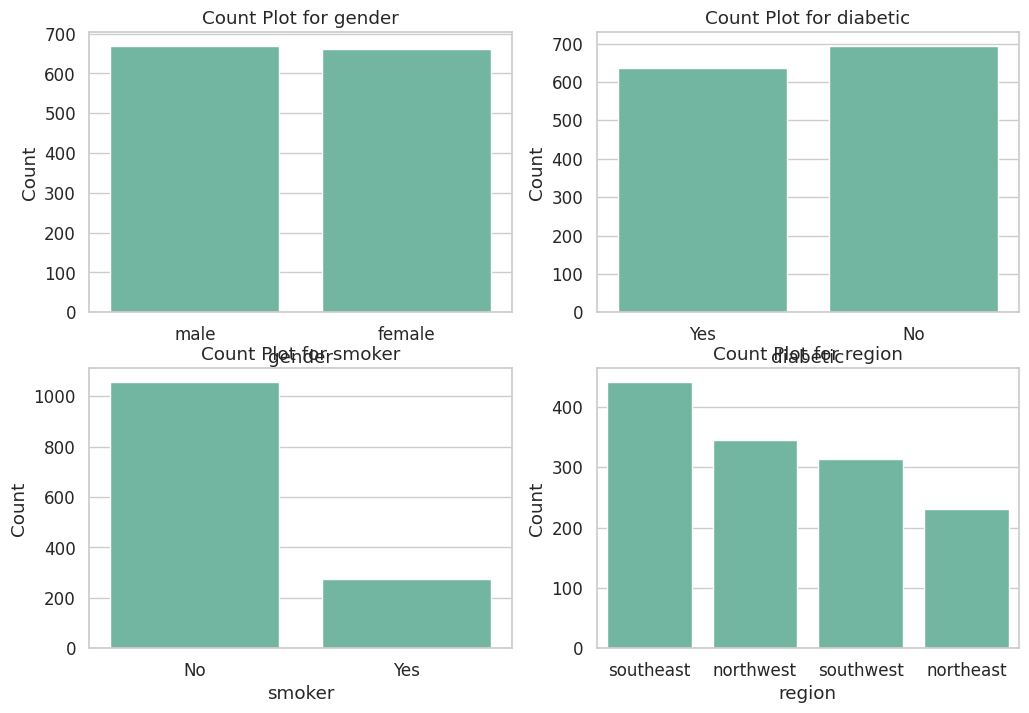

In [124]:
cat_col = ["gender","diabetic","smoker","region"]
plt.figure(figsize=(12,8))
for i,col in enumerate(cat_col,1):
  plt.subplot(2,2,i)
  sns.countplot(data = df,x=col)
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")

In [125]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

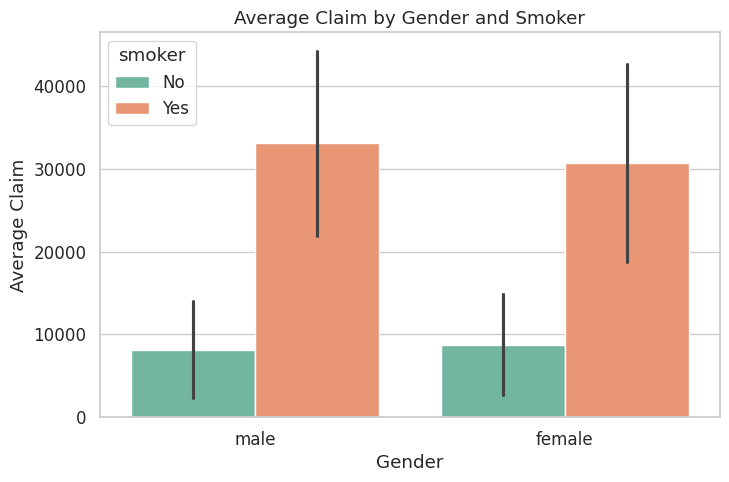

In [126]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Claim by Gender and Smoker")
plt.xlabel("Gender")
plt.ylabel("Average Claim")
plt.show()

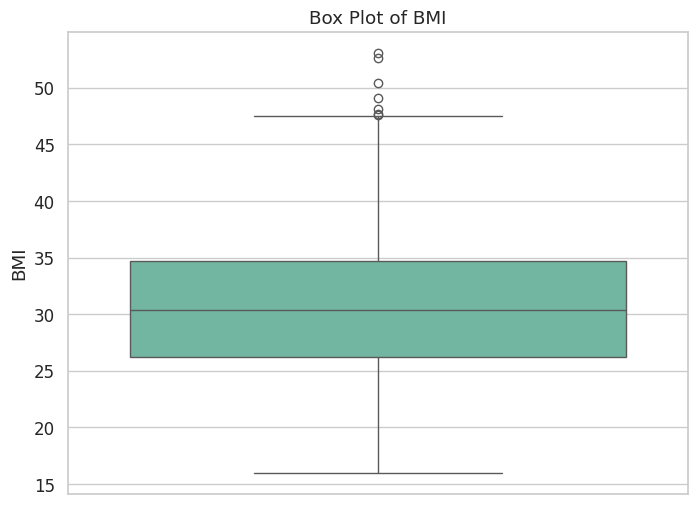

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df["bmi"])
plt.title("Box Plot of BMI")
plt.ylabel("BMI")
plt.show()

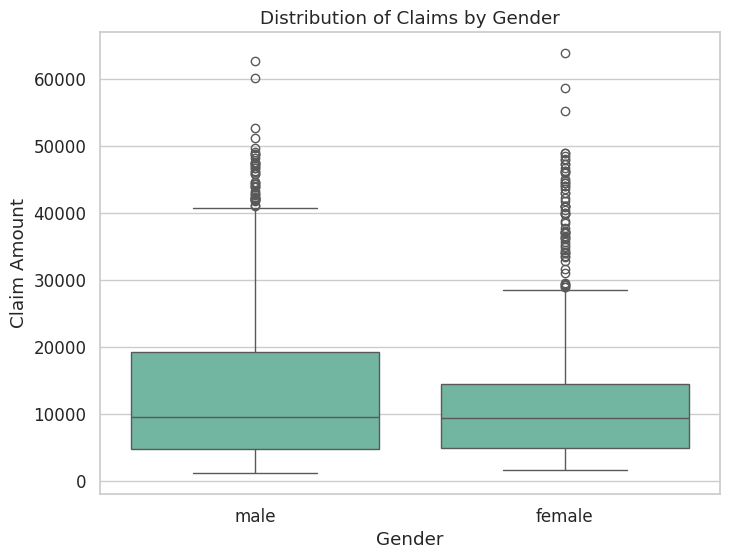

In [128]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='claim')
plt.title('Distribution of Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

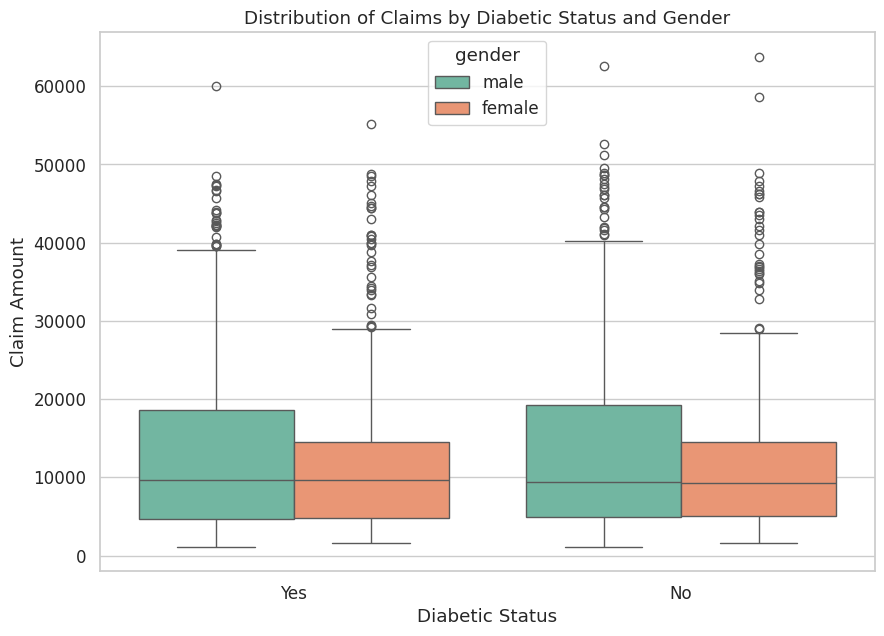

In [129]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='diabetic', y='claim', hue='gender')
plt.title('Distribution of Claims by Diabetic Status and Gender')
plt.xlabel('Diabetic Status')
plt.ylabel('Claim Amount')
plt.show()

In [130]:
feature_cols = ['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker']
X = df[feature_cols]
y = df['claim']

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No



Target (y) head:


,claim
0,1121.87
1,1131.51
7,1146.80
8,1149.40
9,1163.46


In [131]:
from sklearn.preprocessing import LabelEncoder
import pickle

categorical_cols = ['gender', 'diabetic', 'smoker']
encoders = {}

# Create a copy to avoid SettingWithCopyWarning
X_processed = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col])
    encoders[col] = le
    # Save the encoder to a pickle file
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

X = X_processed # Update X with the processed DataFrame

print("Categorical features encoded and encoders saved to pickle files.")
print("Updated X head:")
display(X.head())

Categorical features encoded and encoders saved to pickle files.
Updated X head:


,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1065, 7)
Shape of X_test: (267, 7)
Shape of y_train: (1065,)
Shape of y_test: (267,)


In [133]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4088.64
Mean Squared Error (MSE): 28361564.58
R-squared (R2) Score: 0.80


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the RandomForestRegressor model to ensure 'model' is defined
# This step is included here to robustly handle the 'NameError' from the previous execution
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4088.64
Mean Squared Error (MSE): 28361564.58
R-squared (R2) Score: 0.80


Sorted Feature Importances:
smoker          0.62
bmi             0.21
bloodpressure   0.09
age             0.05
children        0.02
diabetic        0.01
gender          0.01
dtype: float64


/tmp/ipython-input-1621582660.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')


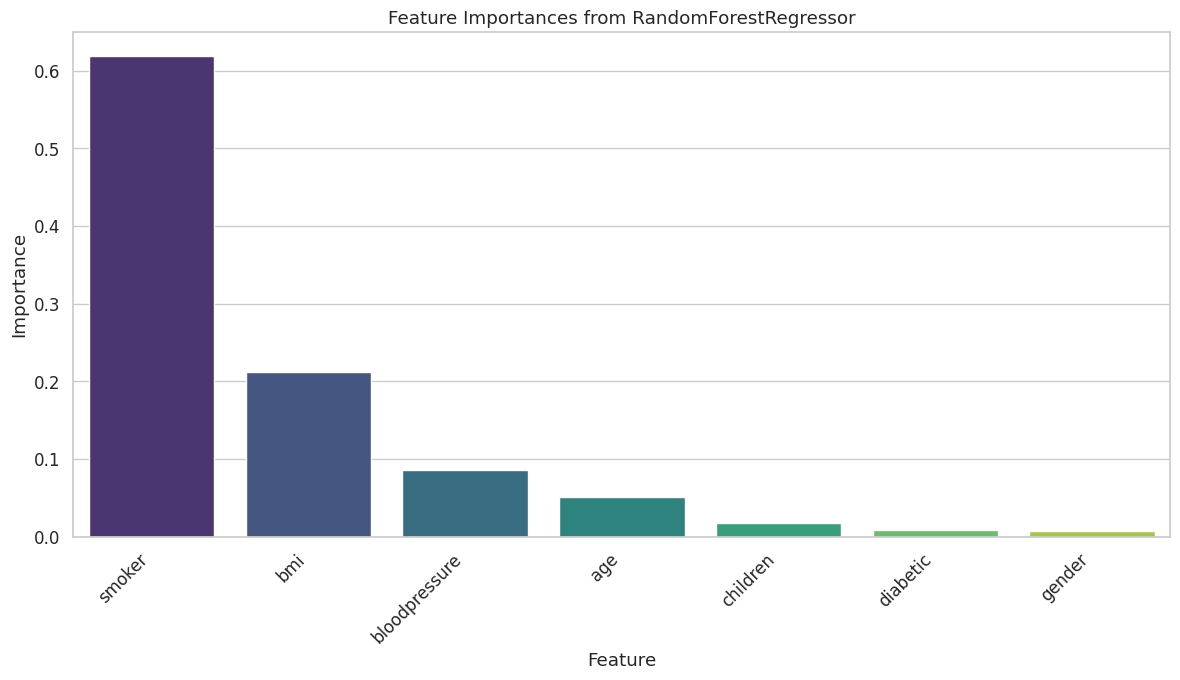

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access feature importances
feature_importances = model.feature_importances_

# Create a Pandas Series with feature names
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print sorted feature importances
print("Sorted Feature Importances:")
print(sorted_feature_importances)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sorted Feature Importances:
smoker          0.62
bmi             0.21
bloodpressure   0.09
age             0.05
children        0.02
diabetic        0.01
gender          0.01
dtype: float64


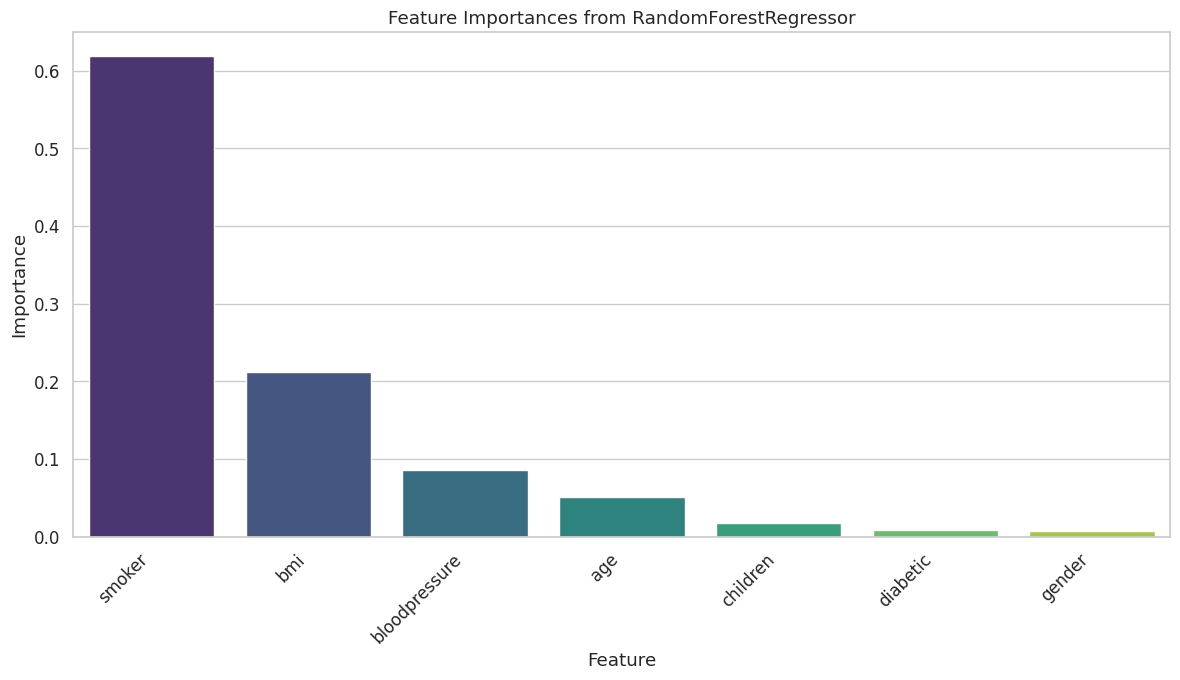

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access feature importances
feature_importances = model.feature_importances_

# Create a Pandas Series with feature names
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print sorted feature importances
print("Sorted Feature Importances:")
print(sorted_feature_importances)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, hue=sorted_feature_importances.index, palette='viridis', legend=False)
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prediction and Interpretation

### Subtask:
Use the trained model to make predictions on the test set and interpret these predictions in the context of the original problem to derive actionable insights about insurance claims.


**Reasoning**:
To fulfill the subtask, I will create a DataFrame comparing the first few actual `y_test` values with their corresponding `y_pred` values, as requested in the instructions.



In [138]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results.head(10))

,Actual,Predicted
1288,43254.42,40842.30
1069,20167.34,18640.79
1258,39836.52,40252.89
306,4435.09,8384.26
245,3659.35,6082.31
596,8310.84,10014.50
248,3732.63,7435.90
285,4234.93,8116.45
895,12890.06,14347.45
712,9964.06,11215.84


## Model Experimentation - Linear Regression

### Subtask:
Train a Linear Regression model using the `X_train` and `y_train` datasets, then evaluate its performance using MAE, MSE, and R-squared on the `X_test` and `y_test` datasets.


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the LinearRegression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the metrics
print(f"\nLinear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")

Linear Regression model trained successfully.

Linear Regression Model Performance:
Mean Absolute Error (MAE): 5034.26
Mean Squared Error (MSE): 40553181.36
R-squared (R2) Score: 0.72


## Model - Decision Tree Regressor
Train a Decision Tree Regressor model using the `X_train` and `y_train` datasets.


In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the metrics
print(f"\nDecision Tree Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2) Score: {r2_dt:.2f}")

Decision Tree Regressor model trained successfully.

Decision Tree Regressor Model Performance:
Mean Absolute Error (MAE): 5169.60
Mean Squared Error (MSE): 51582418.47
R-squared (R2) Score: 0.64


## Model- Gradient Boosting Regressor
Train a Gradient Boosting Regressor model using the `X_train` and `y_train` datasets. Evaluate its performance using MAE, MSE, and R-squared on the `X_test` and `y_test` datasets.


In [141]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Calculate evaluation metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print the metrics
print(f"\nGradient Boosting Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"R-squared (R2) Score: {r2_gbr:.2f}")

Gradient Boosting Regressor model trained successfully.

Gradient Boosting Regressor Model Performance:
Mean Absolute Error (MAE): 3846.86
Mean Squared Error (MSE): 24274289.74
R-squared (R2) Score: 0.83


## Compare Model Performances


In [142]:
import pandas as pd

# Create a dictionary to store the metrics for all models
model_performance = {
    'RandomForestRegressor': {
        'MAE': mae,
        'MSE': mse,
        'R-squared': r2
    },
    'LinearRegression': {
        'MAE': mae_linear,
        'MSE': mse_linear,
        'R-squared': r2_linear
    },
    'DecisionTreeRegressor': {
        'MAE': mae_dt,
        'MSE': mse_dt,
        'R-squared': r2_dt
    },
    'GradientBoostingRegressor': {
        'MAE': mae_gbr,
        'MSE': mse_gbr,
        'R-squared': r2_gbr
    }
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance).T

# Display the DataFrame
print("\nModel Performance Comparison:")
display(performance_df)


Model Performance Comparison:


,MAE,MSE,R-squared
RandomForestRegressor,4088.64,28361564.58,0.80
LinearRegression,5034.26,40553181.36,0.72
DecisionTreeRegressor,5169.60,51582418.47,0.64
GradientBoostingRegressor,3846.86,24274289.74,0.83


## Final Project Summary: Predicting Insurance Claims with Machine Learning

### The Journey to Understanding Insurance Claims

Our project embarked on a mission to predict insurance claim amounts, a crucial task for insurers in assessing risk and setting fair premiums. We began by meticulously cleaning and exploring our dataset, identifying key characteristics and relationships within the data, including handling missing values and preparing features for machine learning models.

After a thorough exploratory data analysis, which revealed the distributions of various factors like age, BMI, and smoking status, we moved into the core of our machine learning endeavor. This involved carefully selecting the most relevant features ('age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker') and setting 'claim' as our target variable. Critically, we transformed categorical data into numerical formats using `LabelEncoder` and split our dataset into training and testing sets to ensure robust model evaluation.

### Unveiling the Best Predictor: Model Performance at a Glance

To find the most accurate prediction engine, we experimented with a suite of machine learning models. Our evaluation focused on key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R-squared (R2) score. Here's what we found:

*   **Gradient Boosting Regressor:** This model truly shone, emerging as the top performer. It achieved the **lowest MAE (~$3,847)** and **MSE (~24.27 million)**, along with the **highest R-squared of 0.83**. This means it could explain 83% of the variability in insurance claims, demonstrating superior predictive power.
*   **RandomForestRegressor:** A strong contender, this model came in a close second. It delivered an MAE of ~$4,089, an MSE of ~28.36 million, and an R-squared of 0.80. The performance difference with Gradient Boosting was marginal but notable.
*   **Linear Regression:** A simpler, foundational model, it provided an R-squared of 0.72, suggesting it could explain a fair portion of the claim variability, but with a higher MAE of ~$5,034.
*   **Decision Tree Regressor:** This model showed the lowest performance among the four, with an R-squared of 0.64 and the highest MAE of ~$5,170.

The results clearly indicate that ensemble methods (Gradient Boosting and RandomForest), which combine multiple weaker prediction models, significantly outperformed the individual Linear Regression and Decision Tree models. This highlights their ability to capture complex patterns within the data more effectively.

### What Really Drives Insurance Claims? Feature Importance

Beyond just prediction, understanding *why* certain claims are higher or lower is invaluable. Our models, particularly the RandomForestRegressor, offered profound insights into feature importance:

*   **Smoking Status is Paramount:** 'Smoker' status emerged as the **overwhelmingly most critical factor**, accounting for roughly **62%** of the predictive power for insurance claims. This is a staggering finding, reinforcing its direct impact on health costs.
*   **BMI and Blood Pressure are Significant:** Following 'smoker' status, 'bmi' (21% importance) and 'bloodpressure' (9% importance) were the next most influential features. These health indicators play a substantial role.
*   **Other Factors:** While 'age', 'children', 'diabetic' status, and 'gender' are relevant, their individual contributions to predicting claim amounts were comparatively smaller (between 1-5%).

### Actionable Insights for the Insurance Industry

This project provides several key takeaways that can empower data-driven decision-making for insurance providers:

1.  **Precision in Risk-Based Pricing:** The undeniable influence of 'smoker' status, 'bmi', and 'bloodpressure' allows for highly refined risk segmentation. Insurers can confidently adjust premiums based on these critical health and lifestyle factors, leading to fairer and more accurate pricing models.
2.  **Targeted Wellness Programs:** Recognizing the impact of BMI and blood pressure, insurance companies could develop or enhance wellness programs specifically designed to help policyholders manage these health metrics. By encouraging healthier lifestyles, insurers could proactively reduce the incidence of high claims, creating a win-win scenario.
3.  **Model Selection for Robustness:** The superior performance of the Gradient Boosting Regressor suggests it's an ideal candidate for deployment in a real-world claims prediction system. Its accuracy and explanatory power offer a robust tool for future use.

